In [1]:
import numpy as np
import pandas as pd
import datetime as dt

np.random.seed(42)

# 1. Customers table
n_customers = 1500
customer_ids = np.arange(1, n_customers + 1)

customers = pd.DataFrame({
    "customer_id": customer_ids,
    "age": np.random.randint(21, 70, size=n_customers),
    "income_band": np.random.choice(
        ["Low", "Medium", "High"],
        size=n_customers,
        p=[0.3, 0.5, 0.2]
    ),
    "region": np.random.choice(
        ["North", "South", "East", "West"],
        size=n_customers
    ),
    "tenure_years": np.round(np.random.exponential(3, size=n_customers), 1)
})

customers.head()


,customer_id,age,income_band,region,tenure_years
0,1,59,Low,East,8.7
1,2,49,High,East,3.6
2,3,35,Medium,East,2.1
3,4,63,Medium,West,8.1
4,5,28,Medium,East,1.7


In [2]:
# 2. Campaigns table
n_campaigns = 8
campaign_ids = np.arange(1, n_campaigns + 1)

channels = ["Email", "App Push", "SMS", "Web"]
offer_types = ["Cashback", "Travel", "Dining", "Retail"]

start_date = dt.date(2024, 1, 1)

campaigns = []

for cid in campaign_ids:
    channel = np.random.choice(channels)
    offer_type = np.random.choice(offer_types)
    start = start_date + dt.timedelta(days=int(np.random.randint(0, 90)))
    end = start + dt.timedelta(days=int(np.random.randint(7, 30)))
    cost = np.random.randint(30000, 120000)  # campaign_cost in dollars

    campaigns.append([cid, channel, offer_type, start, end, cost])

campaigns = pd.DataFrame(
    campaigns,
    columns=["campaign_id", "channel", "offer_type", "start_date", "end_date", "campaign_cost"]
)

campaigns


,campaign_id,channel,offer_type,start_date,end_date,campaign_cost
0,1,Email,Cashback,2024-02-12,2024-02-25,67052
1,2,App Push,Cashback,2024-03-19,2024-04-12,63686
2,3,App Push,Dining,2024-01-30,2024-02-07,71785
3,4,Web,Dining,2024-03-11,2024-04-04,109465
4,5,SMS,Retail,2024-03-10,2024-04-07,46576
5,6,Web,Travel,2024-02-18,2024-03-15,61601
6,7,SMS,Cashback,2024-01-21,2024-02-10,92894
7,8,Web,Travel,2024-02-20,2024-03-16,115119


In [3]:
# 3. Campaign interactions (who was targeted + opened + clicked + converted)

rows = []

# base probabilities by channel
base_open_rate = {
    "Email": 0.45,
    "App Push": 0.55,
    "SMS": 0.4,
    "Web": 0.3
}
base_click_rate = 0.35
base_conv_rate = 0.25

for _, camp in campaigns.iterrows():
    cid = camp["campaign_id"]
    channel = camp["channel"]
    offer_type = camp["offer_type"]

    # randomly target ~30–60% of customers
    targeted_customers = np.random.choice(
        customer_ids,
        size=int(np.random.uniform(0.3, 0.6) * n_customers),
        replace=False
    )

    for cust_id in targeted_customers:
        opened = np.random.rand() < base_open_rate[channel]
        clicked = opened and (np.random.rand() < base_click_rate)

        # slightly better conversion for Cashback & Dining
        conv_boost = 0.1 if offer_type in ["Cashback", "Dining"] else 0.0
        converted = clicked and (np.random.rand() < (base_conv_rate + conv_boost))

        rows.append([
            cust_id,
            cid,
            int(opened),
            int(clicked),
            int(converted)
        ])

campaign_interactions = pd.DataFrame(
    rows,
    columns=["customer_id", "campaign_id", "opened", "clicked", "converted"]
)

campaign_interactions.head()


,customer_id,campaign_id,opened,clicked,converted
0,717,1,0,0,0
1,953,1,0,0,0
2,60,1,1,0,0
3,1170,1,0,0,0
4,1119,1,1,1,1


In [4]:
# 4. Transactions table
# Create transactions only for converted customers (simplified assumption)

trans_rows = []
transaction_id = 1

for _, row in campaign_interactions[campaign_interactions["converted"] == 1].iterrows():
    cust_id = row["customer_id"]
    camp = campaigns.loc[campaigns["campaign_id"] == row["campaign_id"]].iloc[0]

    # 1–3 transactions per converted customer
    n_txn = np.random.randint(1, 4)

    for _ in range(n_txn):
        amount = np.round(np.random.uniform(20, 500), 2)
        date = camp["start_date"] + dt.timedelta(days=int(np.random.randint(0, (camp["end_date"] - camp["start_date"]).days + 1)))
        category = np.random.choice(["Dining", "Travel", "Retail", "Online", "Grocery"])

        trans_rows.append([
            transaction_id,
            cust_id,
            amount,
            category,
            date,
            row["campaign_id"]
        ])
        transaction_id += 1

transactions = pd.DataFrame(
    trans_rows,
    columns=["transaction_id", "customer_id", "amount", "category", "transaction_date", "campaign_id"]
)

transactions.head()


,transaction_id,customer_id,amount,category,transaction_date,campaign_id
0,1,1119,463.24,Grocery,2024-02-24,1
1,2,1119,387.79,Grocery,2024-02-12,1
2,3,532,138.59,Grocery,2024-02-20,1
3,4,34,122.20,Travel,2024-02-23,1
4,5,34,185.40,Dining,2024-02-23,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['transaction_id'].plot(kind='hist', bins=20, title='transaction_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('transaction_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='transaction_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='transaction_id', y='customer_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='customer_id', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['customer_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('customer_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['customer_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('transaction_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='transaction_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('customer_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('transaction_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='transaction_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['transaction_id'].plot(kind='line', figsize=(8, 4), title='transaction_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['customer_id'].plot(kind='line', figsize=(8, 4), title='customer_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['transaction_date'].value_counts()
    for x_label, grp in _df_17.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('transaction_date')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['transaction_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='transaction_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='transaction_id', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['transaction_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='transaction_id', y='transaction_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
# Aggregate interactions per campaign
campaign_stats = (
    campaign_interactions
    .groupby("campaign_id")
    .agg(
        reached_users=("customer_id", "nunique"),
        impressions=("customer_id", "count"),
        opens=("opened", "sum"),
        clicks=("clicked", "sum"),
        conversions=("converted", "sum")
    )
    .reset_index()
)

# Join with campaign info & revenue attribution
revenue_per_campaign = (
    transactions
    .groupby("campaign_id")["amount"]
    .sum()
    .reset_index()
    .rename(columns={"amount": "revenue"})
)

campaign_stats = (
    campaign_stats
    .merge(campaigns, on="campaign_id", how="left")
    .merge(revenue_per_campaign, on="campaign_id", how="left")
)

campaign_stats["revenue"] = campaign_stats["revenue"].fillna(0)

campaign_stats.head()


,campaign_id,reached_users,impressions,opens,clicks,conversions,channel,offer_type,start_date,end_date,campaign_cost,revenue
0,1,856,856,393,130,47,Email,Cashback,2024-02-12,2024-02-25,67052,24637.61
1,2,516,516,274,101,35,App Push,Cashback,2024-03-19,2024-04-12,63686,19101.37
2,3,653,653,360,109,31,App Push,Dining,2024-01-30,2024-02-07,71785,17449.68
3,4,556,556,182,59,22,Web,Dining,2024-03-11,2024-04-04,109465,10467.26
4,5,496,496,200,61,16,SMS,Retail,2024-03-10,2024-04-07,46576,7133.56


In [6]:
campaign_stats["ctr"] = campaign_stats["clicks"] / campaign_stats["opens"].replace(0, np.nan)
campaign_stats["conversion_rate"] = campaign_stats["conversions"] / campaign_stats["reached_users"].replace(0, np.nan)

campaign_stats["cac"] = campaign_stats["campaign_cost"] / campaign_stats["conversions"].replace(0, np.nan)
campaign_stats["roi"] = (campaign_stats["revenue"] - campaign_stats["campaign_cost"]) / campaign_stats["campaign_cost"]

campaign_stats.round(3)


,campaign_id,reached_users,impressions,opens,clicks,conversions,channel,offer_type,start_date,end_date,campaign_cost,revenue,ctr,conversion_rate,cac,roi
0,1,856,856,393,130,47,Email,Cashback,2024-02-12,2024-02-25,67052,24637.61,0.331,0.055,1426.638,-0.633
1,2,516,516,274,101,35,App Push,Cashback,2024-03-19,2024-04-12,63686,19101.37,0.369,0.068,1819.600,-0.700
2,3,653,653,360,109,31,App Push,Dining,2024-01-30,2024-02-07,71785,17449.68,0.303,0.047,2315.645,-0.757
3,4,556,556,182,59,22,Web,Dining,2024-03-11,2024-04-04,109465,10467.26,0.324,0.040,4975.682,-0.904
4,5,496,496,200,61,16,SMS,Retail,2024-03-10,2024-04-07,46576,7133.56,0.305,0.032,2911.000,-0.847
5,6,862,862,229,81,20,Web,Travel,2024-02-18,2024-03-15,61601,9963.92,0.354,0.023,3080.050,-0.838
6,7,760,760,283,95,36,SMS,Cashback,2024-01-21,2024-02-10,92894,20349.96,0.336,0.047,2580.389,-0.781
7,8,451,451,142,47,7,Web,Travel,2024-02-20,2024-03-16,115119,4466.90,0.331,0.016,16445.571,-0.961


In [7]:
channel_offer_perf = (
    campaign_stats
    .groupby(["channel", "offer_type"])
    .agg(
        campaigns_count=("campaign_id", "count"),
        avg_ctr=("ctr", "mean"),
        avg_conversion_rate=("conversion_rate", "mean"),
        avg_cac=("cac", "mean"),
        avg_roi=("roi", "mean")
    )
    .reset_index()
    .sort_values("avg_roi", ascending=False)
)

channel_offer_perf.round(3)


,channel,offer_type,campaigns_count,avg_ctr,avg_conversion_rate,avg_cac,avg_roi
2,Email,Cashback,1,0.331,0.055,1426.638,-0.633
0,App Push,Cashback,1,0.369,0.068,1819.600,-0.700
1,App Push,Dining,1,0.303,0.047,2315.645,-0.757
3,SMS,Cashback,1,0.336,0.047,2580.389,-0.781
4,SMS,Retail,1,0.305,0.032,2911.000,-0.847
6,Web,Travel,2,0.342,0.019,9762.811,-0.900
5,Web,Dining,1,0.324,0.040,4975.682,-0.904


from matplotlib import pyplot as plt
_df_22['campaigns_count'].plot(kind='hist', bins=20, title='campaigns_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['avg_ctr'].plot(kind='hist', bins=20, title='avg_ctr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['avg_conversion_rate'].plot(kind='hist', bins=20, title='avg_conversion_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['avg_cac'].plot(kind='hist', bins=20, title='avg_cac')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('offer_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='campaigns_count', y='avg_ctr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='avg_ctr', y='avg_conversion_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='avg_conversion_rate', y='avg_cac', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='avg_cac', y='avg_roi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['campaigns_count'].plot(kind='line', figsize=(8, 4), title='campaigns_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['avg_ctr'].plot(kind='line', figsize=(8, 4), title='avg_ctr')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['avg_conversion_rate'].plot(kind='line', figsize=(8, 4), title='avg_conversion_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['avg_cac'].plot(kind='line', figsize=(8, 4), title='avg_cac')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['offer_type'].value_counts()
    for x_label, grp in _df_36.groupby('channel')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('channel')
_ = plt.ylabel('offer_type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['channel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='campaigns_count', y='channel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['offer_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='campaigns_count', y='offer_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['channel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='avg_ctr', y='channel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['offer_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='avg_ctr', y='offer_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
# Total revenue per customer
cust_revenue = (
    transactions
    .groupby("customer_id")["amount"]
    .sum()
    .reset_index()
    .rename(columns={"amount": "total_spend"})
)

cust_level = (
    customers
    .merge(cust_revenue, on="customer_id", how="left")
)

cust_level["total_spend"] = cust_level["total_spend"].fillna(0)

# Create simple value segments based on spend
quantiles = cust_level["total_spend"].quantile([0.33, 0.66]).values
q1, q2 = quantiles[0], quantiles[1]

def segment_value(x):
    if x == 0:
        return "No Spend"
    elif x <= q1:
        return "Low Value"
    elif x <= q2:
        return "Mid Value"
    else:
        return "High Value"

cust_level["value_segment"] = cust_level["total_spend"].apply(segment_value)

cust_level.head()


,customer_id,age,income_band,region,tenure_years,total_spend,value_segment
0,1,59,Low,East,8.7,0.0,No Spend
1,2,49,High,East,3.6,0.0,No Spend
2,3,35,Medium,East,2.1,0.0,No Spend
3,4,63,Medium,West,8.1,0.0,No Spend
4,5,28,Medium,East,1.7,0.0,No Spend


In [9]:
segment_summary = (
    cust_level
    .groupby(["value_segment", "income_band"])
    .agg(
        customers=("customer_id", "count"),
        avg_spend=("total_spend", "mean"),
        avg_tenure=("tenure_years", "mean")
    )
    .reset_index()
    .sort_values(["value_segment", "avg_spend"], ascending=[True, False])
)

segment_summary.round(2)


,value_segment,income_band,customers,avg_spend,avg_tenure
0,High Value,High,37,633.93,2.22
1,High Value,Low,53,587.44,2.89
2,High Value,Medium,107,551.22,3.09
3,No Spend,High,253,0.00,3.06
4,No Spend,Low,398,0.00,2.90
5,No Spend,Medium,652,0.00,2.92


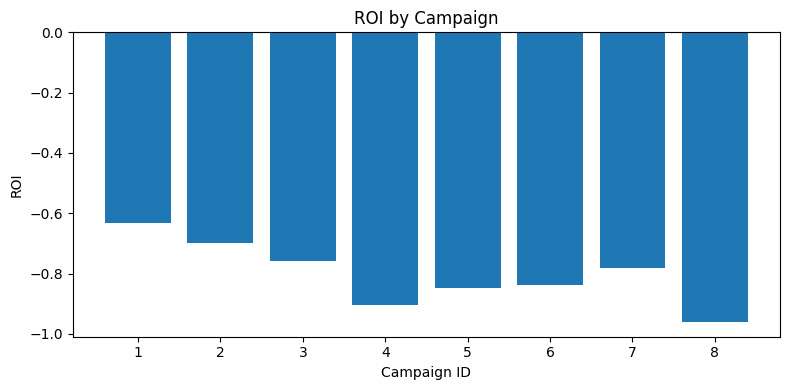

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(campaign_stats["campaign_id"].astype(str), campaign_stats["roi"])
plt.axhline(0, linestyle="--")
plt.title("ROI by Campaign")
plt.xlabel("Campaign ID")
plt.ylabel("ROI")
plt.tight_layout()
plt.show()


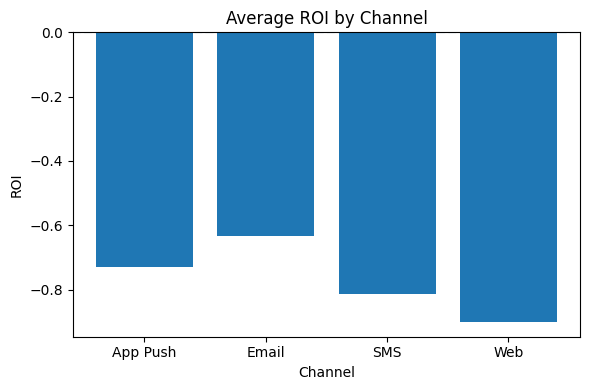

In [11]:
roi_by_channel = (
    campaign_stats
    .groupby("channel")["roi"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6, 4))
plt.bar(roi_by_channel["channel"], roi_by_channel["roi"])
plt.axhline(0, linestyle="--")
plt.title("Average ROI by Channel")
plt.xlabel("Channel")
plt.ylabel("ROI")
plt.tight_layout()
plt.show()


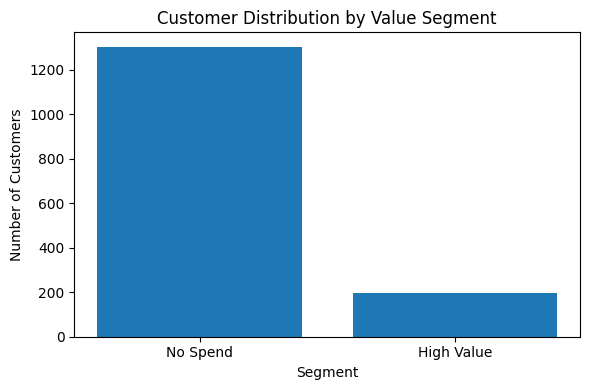

In [12]:
segment_counts = cust_level["value_segment"].value_counts().reset_index()
segment_counts.columns = ["value_segment", "count"]

plt.figure(figsize=(6, 4))
plt.bar(segment_counts["value_segment"], segment_counts["count"])
plt.title("Customer Distribution by Value Segment")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


In [16]:
import sqlite3

# Create SQL connection
conn = sqlite3.connect("amex.db")


In [17]:
customers.to_sql("customers", conn, if_exists="replace", index=False)
campaigns.to_sql("campaigns", conn, if_exists="replace", index=False)
campaign_interactions.to_sql("campaign_interactions", conn, if_exists="replace", index=False)
transactions.to_sql("transactions", conn, if_exists="replace", index=False)


418

In [18]:
import pandas as pd

pd.read_sql("SELECT * FROM customers LIMIT 5;", conn)


,customer_id,age,income_band,region,tenure_years
0,1,59,Low,East,8.7
1,2,49,High,East,3.6
2,3,35,Medium,East,2.1
3,4,63,Medium,West,8.1
4,5,28,Medium,East,1.7


In [19]:
kpi_results = pd.read_sql("""

WITH cs AS (
    SELECT
        campaign_id,
        COUNT(*) AS impressions,
        COUNT(DISTINCT customer_id) AS reached_users,
        SUM(opened) AS opens,
        SUM(clicked) AS clicks,
        SUM(converted) AS conversions
    FROM campaign_interactions
    GROUP BY campaign_id
),
rev AS (
    SELECT
        campaign_id,
        SUM(amount) AS revenue
    FROM transactions
    GROUP BY campaign_id
)

SELECT
    cs.campaign_id,
    c.channel,
    c.offer_type,
    cs.reached_users,
    cs.impressions,
    cs.opens,
    cs.clicks,
    cs.conversions,
    (CAST(cs.clicks AS FLOAT) / NULLIF(cs.opens, 0)) AS ctr,
    (CAST(cs.conversions AS FLOAT) / NULLIF(cs.reached_users, 0)) AS conversion_rate,
    (CAST(c.campaign_cost AS FLOAT) / NULLIF(cs.conversions, 0)) AS cac,
    ((IFNULL(rev.revenue, 0) - c.campaign_cost) * 1.0 / c.campaign_cost) AS roi
FROM cs
JOIN campaigns c ON cs.campaign_id = c.campaign_id
LEFT JOIN rev ON cs.campaign_id = rev.campaign_id;

""", conn)

kpi_results


,campaign_id,channel,offer_type,reached_users,impressions,opens,clicks,conversions,ctr,conversion_rate,cac,roi
0,1,Email,Cashback,856,856,393,130,47,0.330789,0.054907,1426.638298,-0.632560
1,2,App Push,Cashback,516,516,274,101,35,0.368613,0.067829,1819.600000,-0.700070
2,3,App Push,Dining,653,653,360,109,31,0.302778,0.047473,2315.645161,-0.756917
3,4,Web,Dining,556,556,182,59,22,0.324176,0.039568,4975.681818,-0.904378
4,5,SMS,Retail,496,496,200,61,16,0.305000,0.032258,2911.000000,-0.846840
5,6,Web,Travel,862,862,229,81,20,0.353712,0.023202,3080.050000,-0.838251
6,7,SMS,Cashback,760,760,283,95,36,0.335689,0.047368,2580.388889,-0.780934
7,8,Web,Travel,451,451,142,47,7,0.330986,0.015521,16445.571429,-0.961198


In [20]:
kpi_results.to_sql("campaign_kpis", conn, if_exists="replace", index=False)


8

In [21]:
channel_offer_results = pd.read_sql("""

SELECT
    c.channel,
    c.offer_type,
    COUNT(DISTINCT k.campaign_id) AS campaigns_count,
    AVG(k.ctr) AS avg_ctr,
    AVG(k.conversion_rate) AS avg_conversion_rate,
    AVG(k.cac) AS avg_cac,
    AVG(k.roi) AS avg_roi
FROM campaign_kpis k
JOIN campaigns c ON k.campaign_id = c.campaign_id
GROUP BY c.channel, c.offer_type
ORDER BY avg_roi DESC;

""", conn)

channel_offer_results


,channel,offer_type,campaigns_count,avg_ctr,avg_conversion_rate,avg_cac,avg_roi
0,Email,Cashback,1,0.330789,0.054907,1426.638298,-0.632560
1,App Push,Cashback,1,0.368613,0.067829,1819.600000,-0.700070
2,App Push,Dining,1,0.302778,0.047473,2315.645161,-0.756917
3,SMS,Cashback,1,0.335689,0.047368,2580.388889,-0.780934
4,SMS,Retail,1,0.305000,0.032258,2911.000000,-0.846840
5,Web,Travel,2,0.342349,0.019361,9762.810714,-0.899724
6,Web,Dining,1,0.324176,0.039568,4975.681818,-0.904378


In [22]:
!pip install plotly -q

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [23]:
campaign_stats.head()


,campaign_id,reached_users,impressions,opens,clicks,conversions,channel,offer_type,start_date,end_date,campaign_cost,revenue,ctr,conversion_rate,cac,roi
0,1,856,856,393,130,47,Email,Cashback,2024-02-12,2024-02-25,67052,24637.61,0.330789,0.054907,1426.638298,-0.632560
1,2,516,516,274,101,35,App Push,Cashback,2024-03-19,2024-04-12,63686,19101.37,0.368613,0.067829,1819.600000,-0.700070
2,3,653,653,360,109,31,App Push,Dining,2024-01-30,2024-02-07,71785,17449.68,0.302778,0.047473,2315.645161,-0.756917
3,4,556,556,182,59,22,Web,Dining,2024-03-11,2024-04-04,109465,10467.26,0.324176,0.039568,4975.681818,-0.904378
4,5,496,496,200,61,16,SMS,Retail,2024-03-10,2024-04-07,46576,7133.56,0.305000,0.032258,2911.000000,-0.846840


In [24]:
overall_ctr = (campaign_stats["clicks"].sum() / campaign_stats["opens"].replace(0, pd.NA).sum())
overall_conv = (campaign_stats["conversions"].sum() / campaign_stats["reached_users"].replace(0, pd.NA).sum())
overall_cac = (campaign_stats["campaign_cost"].sum() / campaign_stats["conversions"].replace(0, pd.NA).sum())
overall_roi = ((campaign_stats["revenue"].sum() - campaign_stats["campaign_cost"].sum()) /
               campaign_stats["campaign_cost"].sum())

fig_kpi = make_subplots(
    rows=1, cols=4,
    specs=[[{"type": "indicator"}]*4],
    subplot_titles=("CTR", "Conversion Rate", "Avg CAC", "Overall ROI")
)

fig_kpi.add_trace(go.Indicator(
    mode="number",
    value=overall_ctr * 100,
    number={"suffix": "%", "valueformat": ".2f"},
    title={"text": "CTR"}
), row=1, col=1)

fig_kpi.add_trace(go.Indicator(
    mode="number",
    value=overall_conv * 100,
    number={"suffix": "%", "valueformat": ".2f"},
    title={"text": "Conversion Rate"}
), row=1, col=2)

fig_kpi.add_trace(go.Indicator(
    mode="number",
    value=overall_cac,
    number={"prefix": "$", "valueformat": ".2f"},
    title={"text": "Average CAC"}
), row=1, col=3)

fig_kpi.add_trace(go.Indicator(
    mode="number",
    value=overall_roi * 100,
    number={"suffix": "%", "valueformat": ".2f"},
    title={"text": "Overall ROI"}
), row=1, col=4)

fig_kpi.update_layout(
    title_text="Campaign Performance – Key KPIs",
    template="plotly_white",
    height=250,
    margin=dict(l=40, r=40, t=60, b=20)
)

fig_kpi.show()


In [25]:
fig_roi_campaign = px.bar(
    campaign_stats,
    x=campaign_stats["campaign_id"].astype(str),
    y="roi",
    color="roi",
    color_continuous_scale="Blues",
    labels={"campaign_id": "Campaign ID", "roi": "ROI"},
    title="ROI by Campaign"
)

fig_roi_campaign.update_layout(
    template="plotly_white",
    xaxis_title="Campaign ID",
    yaxis_title="ROI (fraction)",
)

fig_roi_campaign.add_hline(y=0, line_dash="dash")

fig_roi_campaign.show()


In [26]:
roi_by_channel = (
    campaign_stats
    .groupby("channel")["roi"]
    .mean()
    .reset_index()
)

fig_roi_channel = px.bar(
    roi_by_channel,
    x="channel",
    y="roi",
    text="roi",
    title="Average ROI by Channel",
    labels={"roi": "Average ROI", "channel": "Channel"},
    color="roi",
    color_continuous_scale="Blues"
)

fig_roi_channel.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig_roi_channel.update_layout(
    template="plotly_white",
    yaxis_title="Average ROI (fraction)",
    xaxis_title="Channel"
)

fig_roi_channel.add_hline(y=0, line_dash="dash")

fig_roi_channel.show()


In [27]:
channel_offer_perf = (
    campaign_stats
    .groupby(["channel", "offer_type"])
    .agg(
        campaigns_count=("campaign_id", "count"),
        avg_ctr=("ctr", "mean"),
        avg_conversion_rate=("conversion_rate", "mean"),
        avg_cac=("cac", "mean"),
        avg_roi=("roi", "mean")
    )
    .reset_index()
)


In [28]:
fig_offer_roi = px.bar(
    channel_offer_perf,
    x="offer_type",
    y="avg_roi",
    color="offer_type",
    title="Average ROI by Offer Type",
    labels={"offer_type": "Offer Type", "avg_roi": "Average ROI"},
    barmode="group"
)

fig_offer_roi.update_layout(
    template="plotly_white",
    yaxis_title="Average ROI (fraction)",
    xaxis_title="Offer Type",
    showlegend=False
)

fig_offer_roi.show()


In [29]:
fig_ctr_conv = px.scatter(
    campaign_stats,
    x="ctr",
    y="conversion_rate",
    size="reached_users",
    color="roi",
    hover_data=["campaign_id", "channel", "offer_type"],
    color_continuous_scale="Blues",
    labels={
        "ctr": "CTR",
        "conversion_rate": "Conversion Rate",
        "roi": "ROI"
    },
    title="CTR vs Conversion Rate by Campaign<br><sup>Bubble size = reached users, color = ROI</sup>"
)

fig_ctr_conv.update_layout(
    template="plotly_white",
    xaxis_tickformat=".1%",
    yaxis_tickformat=".1%"
)

fig_ctr_conv.show()


In [33]:
customers.to_csv("customers.csv", index=False)
campaigns.to_csv("campaigns.csv", index=False)
campaign_interactions.to_csv("campaign_interactions.csv", index=False)
transactions.to_csv("transactions.csv", index=False)
